# Some Insight in Coding Techniques / Best Practices

![](graphics/cartoon.png)

## Why is this important?
* Prevent Bugs
* Help yourself understand what you did half a year ago
* Help others understand the code you wrote when collaborating
    * or when other people base their work on yours (e.g. when you develop models)
* Give others opportunity to reproduce your results by giving them understandable code
* Save time in the long run

Remarks: 
1. These are just examples, hints, guidelines, potential pitfalls
1. Most of these depend on the situation
1. I just show you some things on a high level, so you know what's out there
1. Decide yourself what seems relevant for you
1. Everyone will write crappy code sometime for numerous reasons, but we should know when we do that and how we can avoid it when we have enough time and resources

# Readable Code

## Naming and Comments

### Bad Example: What Does This Do??

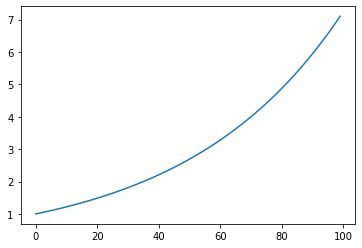

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a = 0.02
b = 1
xx = np.arange(0, 100)
yy = b*(1+a)**xx
plt.plot(xx, yy);

### Comments, a little bit better, but still...

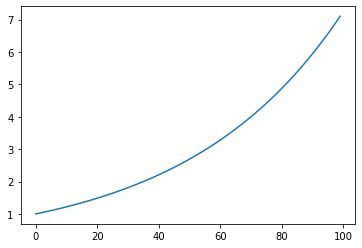

In [3]:
a = 0.02 # interest rate
b = 1 # initial investment
xx = np.arange(0, 100) # years
yy = b*(1+a)**xx # money value after x years
plt.plot(xx, yy);

### There we go: Proper Naming

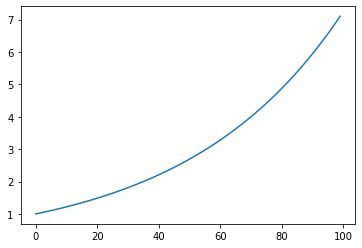

In [5]:
interest_rate = 0.02
initial_investment = 1
time_years = np.arange(0, 100)
all_that_money_in_my_bank_account = initial_investment*(1+interest_rate)**time_years
plt.plot(time_years, all_that_money_in_my_bank_account);

### Alternatively: Functions! And (Named) Parameters!

In [6]:
def calculate_bank_account_value(initial_investment, interest_rate, time_in_years):
    return initial_investment*(1+interest_rate)**time_in_years

calculate_bank_account_value(initial_investment=1, interest_rate=0.02, time_in_years=8)

1.1716593810022657

### A Note On Comments

* Problem: Comments are often forgotten when code is changed
    * No comments are better than wrong comments
* Sometimes they're just obsolete clutter
* Only use if you can't explain it in code
* Don't comment out code (more on that later)
* Our case is a bit special since the models are complex, often refer to Papers etc
    * Still try to make the code as understandable without comments as possible.
* README files can be helpful to explain how a module of code works

#### Bad Example
When deciding to account in PgC instead of PgCO2, the first comment will likely be forgotton to be adapted.

Note also the **Magic number** 3.664. This is bad practice.

In [2]:
# computes emissions in Pg CO2
def compute_emissions_from_harvests(gridcell):
    
    # total harvests
    total_harvests = 0
    
    # go through the stands in the gridcell
    for stand in gridcell.stands:
        
        total_harvests += stand.harvest
        
    # convert from C to CO2 (see e.g., LeQuere 2018)
    return total_harvests * 3.664


#### Better
When you change to return PgC now, you will likely see that the function's name needs to be adapted

In [1]:
conversion_factor_c_co2 = 3.664 # mass CO2 vs C, see e.g., LeQuere 2018
def compute_emissions_from_harvests_pg_co2(gridcell):
    
    total_harvests_c = 0
    
    for stand in gridcell.stands:
        total_harvests_c += stand.harvest
        
    return total_harvests_c * conversion_factor_c_co2


## Methods / Functions
* They also should have proper names
* They should be small!
* They should do only one thing
    * `Single Responsibility Principle`
    * If they do more, they should be split in multiple functions
* They are a good way to make the code readable and testable
* Especially this is important if we do the same things in many places

### Good LPJ Example: simulate_day()
Every function responsible for **one** thing
(note: how much info do these comments give us?)
```c
void simulate_day(Gridcell& gridcell, Input& input_modules) {
    ...
    // Leaf phenology for PFTs and individuals
    leaf_phenology(patch, gridcell.climate);
    // Interception
    interception(patch, gridcell.climate);
    initial_infiltration(patch, gridcell.climate);
    // Photosynthesis, respiration, evapotranspiration
    canopy_exchange(patch, gridcell.climate);
    // Sum total required irrigation
    irrigation(patch);
    // Soil water accounting, snow pack accounting
    soilwater(patch, gridcell.climate);
    ...
}
```

## Code Style

* Take care of proper indentation
* Every language has more or less fixed conventions on naming
* Python: `snake_case` and rarely `CamelCase`:
    * def my_function_name()
    * class MyClass
* C++: `CamelCase` and `snake_case`
* R: 
    * http://web.stanford.edu/class/cs109l/unrestricted/resources/google-style.html
    * do not use dots in variable names
* In a large project, there are often project-guidelines.

# DRY-Princile (Don't Repeat Yourself)

* Avoid having to change all over the place when something small changes
    * There will come the time when you change it and forget it on one place!
* LPJ Example: diam of individual
    * see where indiv.height is used
    * better: create function `indiv.diam()`

# Version Control

This will result in confusion:

In [9]:
for person in person_list:
    person.calculate_something()

    # person.do_the_thing()
    # person.money = 1000
    
    person.money = 500
    person.do_other_thing()

* Why do we not do **the thing** anymore?
* Why not 1000, but 500 now?
* Is this a bug?
* Is this work in progress?

Instead of commenting out: commit the code before you change it, delete the code, add the new code, commit again.

# Coding Pitfalls

# Datatypes

* Programming languages all have **data types**
* In some languages (Java, C++, ...) you have to tell the programm exactly what type of variable something is
    * integer number
    * decimal number
    * true/false value
    * string of characters
    * ...
* In other languages (Python, R, ...), you can usually do whatever!
    * but internally all variables still have a type, be careful!
    * in R tidy data types can be important for empty values (e.g., `NA_real_`)

In [3]:
# would never work in C++, Java, ...
a = 123
a = True
a = 12.3
a = "hello"

# Division

### In C, C++, Java, ...

```c
int a = 4;
int b = 9;
int c = a/b;
```

#### Result and Solution

Result:
```c
0
```

Reason:
* The variables are `int`s and can only hold integer values, not decimals

Solution:

```c
double a = 4.0
int b = 9
double c = a/b
```

### In Mathematica, R, Python3 ...:

No Problem!

In [1]:
4/9

0.4444444444444444

Python2 has the same problem!
```bash
konni@konni-xps15:~$ ipython2
In [1]: 2/3
Out[1]: 0

```

## Integer / Long Overflow

```c
int a = 2147483647;
int b = a+1;
```

$\rightarrow$ What is the value of $b$?

### Explanation
Result:
```c
-2147483648
```

* int has 4 bytes = 32 bit
    * 0 = |0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|
    * 11 = |0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|1|1| = $2^3+2^1+2^0$
    * for negative numbers it is more complex... (https://en.wikipedia.org/wiki/Two%27s_complement)
* first bit is for the sign (+ or -)
* thus int-range is: $[-2^{31}, 2^{31} -1]$
* upper bound $2^{31} -1 = 2147483647$
* adding 1 to the upper bound leads to an **overflow** and results in $-2^{31}$

**Note**: in C++ the upper bound depends on compiler and machine, but the problem will only be shifted to higher numbers

### Possible Effects
https://youtu.be/gp_D8r-2hwk?t=13

### Solutions

Solution 1:
```c
long a = 2147483647;
long b = a+1;
std::cout << b << std::endl;
```

* Problem: Different compilers also have different sizes for **long**

Solution 2:
```c
int64_t a = 2147483647;
int64_t b = a+1;
std::cout << b << std::endl;
```

* Problem: Same thing will still occur, but for $2^{63} -1 $

### Python, R, Mathematica, ...

No Problem!

In [5]:
a = 2147483647
a + 1

2147483648

In [19]:
a + 2**123

10633823966279326983230456484390240255

## Floating Point Precision
Problematic in every (?) programming language:

In [9]:
0.1 + 0.2

0.30000000000000004

In [11]:
0.6 - 0.6

0.0

In [12]:
0.6 - 0.4 - 0.2

-5.551115123125783e-17

So never do this:

In [ ]:
if npp == 0:
    die()
else:
    do_something()

Instead do something like this:

In [ ]:
TOLERANCE = 0.0000001
if abs(npp) < TOLERANCE:
    die()
else:
    do_something()

https://medium.com/better-programming/why-is-0-1-0-2-not-equal-to-0-3-in-most-programming-languages-99432310d476

## Pointers, Values, and References

```c
int c = 5;
int d = c;
int& e = c;
e++;
```

What happens here?

* c **and** e will become 6 because both point to **the same address in computer memory** (that's what the `&` does)
* So changing e changes the values in the computer memory and this affects both `c` and `e` since they both point there
* d will **not** be affected: `int d = c` creates a **copy**, so `d` has nothing to do with `c` after the **value** was copied

### This is extremely important in LPJ-GUESS!

Compare those two functions, what will happen?

```c
void chop_down(Individual individual) {
    individual.height = 0.0;
}

void chop_down2(Individual& individual) {
    individual.height = 0.0;
}
```

* calling `chop_down(indiv)` will **not** change `indiv`
* it will internally create a copy and only change the height of the copy
* calling `chop_down2(indiv)` will actually change the `indiv` variable, because due to the `&` it actually works with the object stored in the 

![](graphics/boi.jpeg)

## This is also important in Python!

For instance in numpy-arrays and pandas dataframes

In [8]:
import pandas as pd
df = pd.DataFrame(columns=['A', 'B'], index=['row1', 'row2'], data=[[1, 2], [3, 4]])
df2 = df.copy() # same same, but different
df3 = df # EXACT same
df

,A,B
row1,1,2
row2,3,4


In [9]:
df2.loc['row1', 'A'] = 9999
df

,A,B
row1,1,2
row2,3,4


In [10]:
df3.loc['row1', 'A'] = 9999
df

,A,B
row1,9999,2
row2,3,4


## This is (usually) not a problem in R!

* In R, objects are immutable and a copy is created
* It can, however, be achieved by using `environments` using `setRefClass`
* For some packages, it might also be relevant (for instance, `Rcpp`)

# Unit-Testing

* Making sure the code does what it's supposed to do
* Understand / Document what the code does
* Make sure you don't break existing code

## Python Examples with `unittest` and `doctest` packages

--> Demo at `$phd/notes/presi/clean_code`

## Tips
* Make sure you have seen a test fail! Otherwise you might have written a test that is always green.
* In professional software development, everything is tested. For you work, decide what should be tested
    * To consider: we write a lot of code to explore data, but often throw the code away. Maybe wait until you know you will keep using the code before you test

## Test Frameworks
* Python: unittest and doctest
* R: test_that, exampletestr
* C++: Catch2, Google_tests

# Assertions

* Assertions: Like small unit tests in your code
    * Advantage: check everything is ok right where you write the actual code
    * Example:
  ```
  double prob = 1/stand.get_distinterval();
  assert(prob >= 0 && prob <= 1);
  ```
* Note that in compiled code, assertions might be optimized away!
* In languages that do not support assertions, you can help yourself with `if` statements.

In [ ]:
def compute_total_c_pool_in_giga_tons_new(lat_lon_total_values_per_m2, field_of_interest, lat_frac = 0.5, lon_frac = 0.5):
    assert lat_lon_total_values_per_m2.index.is_unique, "Index is not unique! Maybe grid cells are duplicated?"

    if 'Year' in lat_lon_total_values_per_m2.columns:
        assert is_unique(lat_lon_total_values_per_m2['Year']), "Values of multiple years in aggregation!"

    assert 'Lon' in lat_lon_total_values_per_m2.index.names and 'Lat' in lat_lon_total_values_per_m2.index.names

    lat_lon_total_values_per_m2['area'] = lat_lon_total_values_per_m2.index.map(lambda x: get_area_for_lon_and_lat(x[0], x[1], formula=True, lat_frac=lat_frac, lon_frac=lon_frac))
    computed = lat_lon_total_values_per_m2.apply(lambda x: x['area'] * x[field_of_interest], axis=1).sum()

    kg_to_Gt = 1000 ** 4
    return np.sum(computed) / kg_to_Gt

# TL;DL*
1. Proper naming of variables is important
1. Try to make the code self-explanatory, use comments sparsely when needed
1. Create short functions with good names to make code more understandable
1. Test your functions to make sure they are correct and to have solid documentation for how the function works
1. Don't repeat yourself
1. Be aware of limitations of a programming language (think: overflow, rounding)
1. Be aware of "exact same" vs "same same but different"
    * `&` in C++!
    * `df2 = df` or `df3 = df.copy()` in Python
1. Do not comment out code
1. Use Version Control

*too long; didn't listen

# End of the first Part =D

<img src='graphics/bird.png' width=400/>

# IDEs and Git

# IDEs

* Integrated Development Environment
* Software for Coding
* with many tools
* Normally for one specific programming language
* Examples: RStudio, Eclipse, IntelliJ, PyCharm, CLion, DataSpell...

Most important features:
* Code completion
* Unit testing
* Tools for compilation etc.
* Version control integration
* Debugging with breakpoints!

# IDE Demo

* using PyCharm with the unit testing example
    * debugging with breakpoints!
* using DataSpell with Notebooks
    * Note: automatically comes with nice notebook-git-integration!
* using CLion with LPJ-GUESS management

# Version Control with **git**

# What can you do with git?

![](graphics/merge.png)

* commit stages of work
* go back in time
* backup the work
* collaborate

# Local Representation
![](graphics/gitdiagram.png)

# git Demo

PyCharm --> `$phd/small_python_project`

* init repo
* write code
* make a commit
* make another commit
* make a new branch
* merge the branch
* .gitignore
* push to GitHub
* merge conflict

# Try it out

https://github.com/kuahyeow/git-workshop/tree/master

--> only the first part

# Backing the repository up online

* Go to Github, create new repositury and push the changes
* make another simple commit
* compare local and remote: the commit is not online!
    * this is a **crucial** difference to other version control systems like `svn`
* push the commit
* verify that it is online in Github